## Imports:

In [10]:
import os
import librosa
import numpy as np
import resampy
import matplotlib.pyplot as plt

## Setup:

In [11]:
dataset_path = "../Data/Dataset"

## Data Loading and Preprocessing:

In [12]:
def extract_features(file_path, max_pad_len=100):
    audio, sr = librosa.load(file_path, res_type="kaiser_fast")
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)

    if mfccs.shape[1] > max_pad_len:
        mfccs = mfccs[:, :max_pad_len]

    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode="constant")
    
    return mfccs

def prepare_dataset(dataset_path):
    X = []
    y = []
    for folder in os.listdir(dataset_path):
        for file in os.listdir(os.path.join(dataset_path, folder)):
            file_path = os.path.join(dataset_path, folder, file)
            mfccs = extract_features(file_path)
            X.append(mfccs)
            y.append(folder)
            
    return np.array(X), np.array(y)

X, y = prepare_dataset(dataset_path)

## Encoding Labels and Splitting Data:

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

## Build and Compile the Model:

In [14]:
from keras import layers, models

model = models.Sequential()

model = models.Sequential([
    layers.Input(shape=X_train.shape[1:]),  # Input shape depends on the extracted features
    layers.Flatten(),  # Flatten the input if needed
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Model Training:

In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


6/6 [==============================] - 0s 22ms/step - loss: 27.0964 - accuracy: 0.7391 - val_loss: 38.1258 - val_accuracy: 0.6341
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 17.2603 - accuracy: 0.8012 - val_loss: 56.6727 - val_accuracy: 0.5854
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 19.3495 - accuracy: 0.7578 - val_loss: 17.1629 - val_accuracy: 0.7805
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 10.0091 - accuracy: 0.8820 - val_loss: 24.0288 - val_accuracy: 0.7073
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 6.9039 - accuracy: 0.8820 - val_loss: 6.5578 - val_accuracy: 0.8049
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 16.9014 - accuracy: 0.7329 - val_loss: 20.0244 - val_accuracy: 0.7317
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 7.8535 - accuracy: 0.8571 - val_loss: 18.8500 - val_accuracy: 0.6829
Epoch 8/50
6/6 [=================

## Evaluate the Model:

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy: ", test_acc)
print("Test loss: ", test_loss)

2/2 [==============================] - 0s 3ms/step - loss: 2.2265 - accuracy: 0.8780
Test accuracy:  0.8780487775802612
Test loss:  2.226513147354126


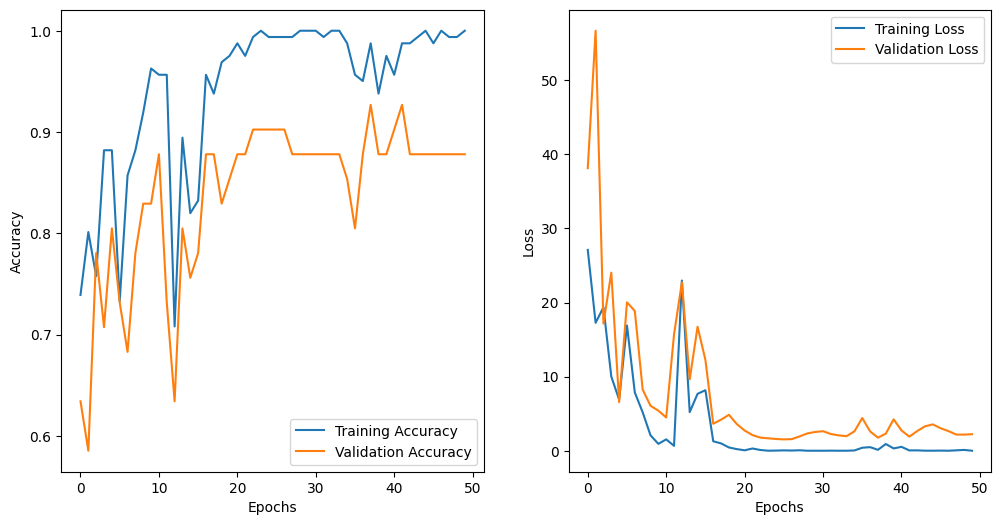

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.show()